In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
#Import Ames House Dataset
df= pd.read_csv("Rainfall.csv")

In [16]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [18]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [19]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

# Handling Missing Values

In [20]:
df['winddirection'].fillna(df['winddirection'].median(), inplace=True)
df['windspeed'].fillna(df['windspeed'].median(), inplace=True)

In [21]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

# Handling Categorical Data

In [22]:
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})

In [23]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


# Outlier detection and removal

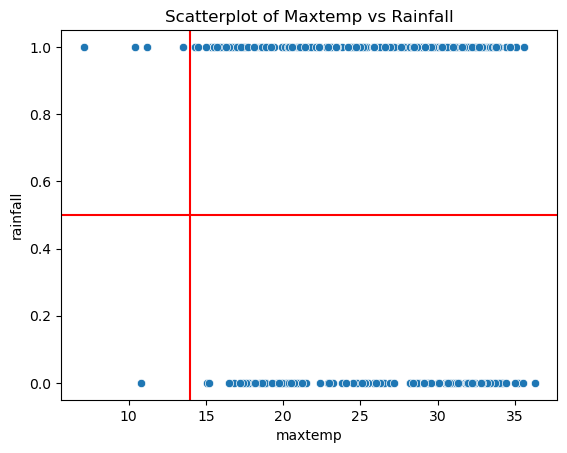

In [32]:
sns.scatterplot(data=df, x='maxtemp', y='rainfall')
plt.axhline(y=0.5, color="r")  
plt.axvline(x=14, color="r")  
plt.title('Scatterplot of Maxtemp vs Rainfall')
plt.show()



In [37]:
df[(df['rainfall']<2) & (df["maxtemp"]<15)][["rainfall","maxtemp"]]

,rainfall,maxtemp
22,1,10.4
23,1,7.1
24,0,10.8
25,1,13.5
32,1,11.2
33,1,14.3
47,1,14.4
70,1,14.3
71,1,14.5


In [38]:
index_drop=df[(df['rainfall']<2) & (df["maxtemp"]<15)].index

df=df.drop(index_drop,axis=0)# axis=0 hazfe satr

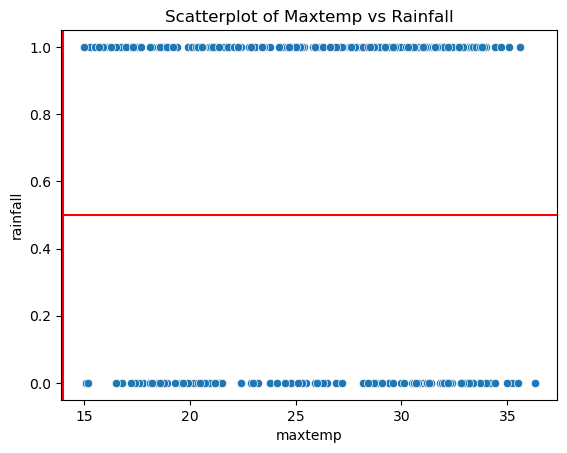

In [40]:
sns.scatterplot(data=df, x='maxtemp', y='rainfall')
plt.axhline(y=0.5, color="r")  
plt.axvline(x=14, color="r")  
plt.title('Scatterplot of Maxtemp vs Rainfall')
plt.show()

In [ ]:
#----------------------

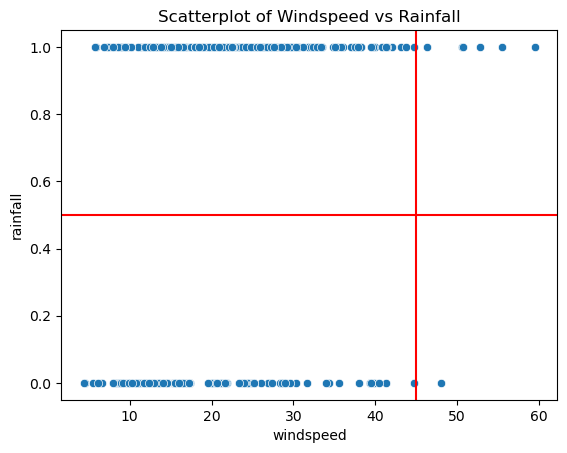

In [33]:
sns.scatterplot(data=df, x='windspeed', y='rainfall')
plt.axhline(y=0.5, color="r")  
plt.axvline(x=14, color="r")  
plt.title('Scatterplot of Windspeed vs Rainfall')
plt.show()

In [42]:
df[(df['windspeed']>40) & (df["rainfall"]<2)][["windspeed","rainfall"]]

,windspeed,rainfall
19,50.6,1
30,43.1,1
36,44.7,0
51,44.7,1
83,42.0,1
257,41.3,0
276,52.8,1
277,50.7,1
304,40.8,1
314,46.3,1


In [43]:
index_drop=df[(df['windspeed']>40) & (df["rainfall"]<2)].index

df=df.drop(index_drop,axis=0)# axis=0 hazfe satr

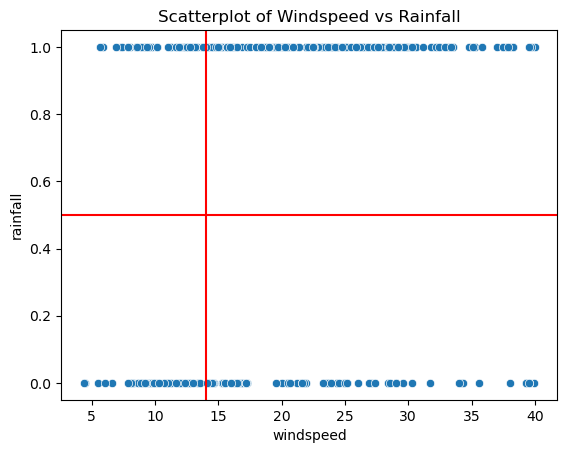

In [44]:
sns.scatterplot(data=df, x='windspeed', y='rainfall')
plt.axhline(y=0.5, color="r")  
plt.axvline(x=14, color="r")  
plt.title('Scatterplot of Windspeed vs Rainfall')
plt.show()

# Feature Engineering

In [ ]:
#New Features

In [45]:
df['day_of_week'] = pd.to_datetime(df['day'], format='%j').dt.weekday
df['season'] = pd.cut(df['day'], bins=[0, 90, 180, 270, 365],
                      labels=['Spring', 'Summer', 'Fall', 'Winter'])

In [46]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,day_of_week,season
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3,0,Spring
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3,1,Spring
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2,2,Spring
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9,3,Spring
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7,4,Spring


In [ ]:
#converting features new branches

In [48]:
df['temperature_range'] = df['maxtemp'] - df['mintemp']
df['temperature_difference'] = df['maxtemp'] - df['temparature']
df['sunshine_to_humidity'] = df['sunshine'] / df['humidity ']

In [49]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,day_of_week,season,temperature_range,temperature_difference,sunshine_to_humidity
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3,0,Spring,3.1,1.6,0.129167
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3,1,Spring,4.5,2.8,0.007407
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2,2,Spring,2.3,1.0,0.000000
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9,3,Spring,3.2,1.7,0.011111
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7,4,Spring,1.1,0.6,0.000000


In [50]:
# 
df['wind_power'] = df['windspeed'] * df['winddirection']


In [51]:
#removing past features
df.drop(['day', 'windspeed', 'winddirection'], axis=1, inplace=True)


In [52]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,day_of_week,season,temperature_range,temperature_difference,sunshine_to_humidity,wind_power
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,0,Spring,3.1,1.6,0.129167,2104.0
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,1,Spring,4.5,2.8,0.007407,765.0
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,2,Spring,2.3,1.0,0.000000,568.0
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,3,Spring,3.2,1.7,0.011111,845.0
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,4,Spring,1.1,0.6,0.000000,548.0
